In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
506,14,55,15,27.335809,55.277559,8.050304,73.447753,mothbeans
1329,88,29,51,24.718855,88.945683,6.095690,48.459786,watermelon
1054,95,75,45,28.983334,82.959582,5.829899,109.022564,banana
996,4,14,41,19.851393,89.807323,6.430163,102.818636,pomegranate
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
647,35,48,15,27.108181,87.451267,6.981758,55.037240,mungbean
682,6,47,18,29.161746,80.280381,6.715277,40.165460,mungbean
1530,37,126,196,23.599973,90.975977,5.596449,107.172819,apple
1541,21,137,196,23.611920,91.702938,5.812782,123.590082,apple
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans


In [5]:
df.shape

(2200, 8)

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [8]:
df['humidity'].value_counts()

humidity
60.396475    1
82.002744    1
80.319644    1
82.320763    1
80.158363    1
            ..
80.544986    1
84.497744    1
80.644165    1
84.943760    1
80.331272    1
Name: count, Length: 2200, dtype: int64

In [ ]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1526,13,144,197,22.921571,94.896134,6.280223,105.694154,apple
797,42,79,23,27.716783,63.291034,6.781842,68.565080,blackgram
1217,3,136,205,17.586294,80.848066,6.334771,71.406545,grapes
948,22,26,38,22.920523,85.129122,6.988035,110.243784,pomegranate
1414,109,26,45,28.279737,90.389712,6.224535,21.589925,muskmelon


## 4. Importing all ML Algorithms from Scikit-Learn

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [5]:
models1 = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [13]:
# Create standard scaler object
scaler = StandardScaler()

# Select columns to scale
cols_to_scale = ['temperature', 'humidity', 'ph', 'rainfall']

# Fit and transform selected columns
scaled_features = scaler.fit_transform(df[cols_to_scale])

# Create new dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=cols_to_scale)

# Add back other columns that were not scaled
scaled_df['N'] = df['N']
scaled_df['P'] = df['P'] 
scaled_df['K'] = df['K']
scaled_df['label'] = df['label']

In [23]:
import pickle

# Save the scaler
with open('std_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
scaled_df.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,-0.935587,0.472666,0.043302,1.810361,90,42,43,rice
1,-0.759646,0.397051,0.734873,2.242058,85,58,41,rice
2,-0.515898,0.486954,1.771510,2.921066,60,55,44,rice
3,0.172807,0.389805,0.660308,2.537048,74,35,40,rice
4,-1.083647,0.454792,1.497868,2.898373,78,42,42,rice


In [16]:
minmax_scaler = MinMaxScaler()

# Fit and transform selected columns
scaled_features = minmax_scaler.fit_transform(df[cols_to_scale])

# Create new dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=cols_to_scale)

# Add back other columns that were not scaled
scaled_df['N'] = df['N']
scaled_df['P'] = df['P']
scaled_df['K'] = df['K']
scaled_df['label'] = df['label']

In [14]:
scaled_df.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,-0.935587,0.472666,0.043302,1.810361,90,42,43,rice
1,-0.759646,0.397051,0.734873,2.242058,85,58,41,rice
2,-0.515898,0.486954,1.771510,2.921066,60,55,44,rice
3,0.172807,0.389805,0.660308,2.537048,74,35,40,rice
4,-1.083647,0.454792,1.497868,2.898373,78,42,42,rice


## 5. Splitting the Data into Training and Testing Sets

In [15]:
# Separate features and target
X = scaled_df.drop('label', axis=1)
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Train a model (example with Decision Tree)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training set shape: (1760, 7)
Testing set shape: (440, 7)
Accuracy: 0.9840909090909091
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00 

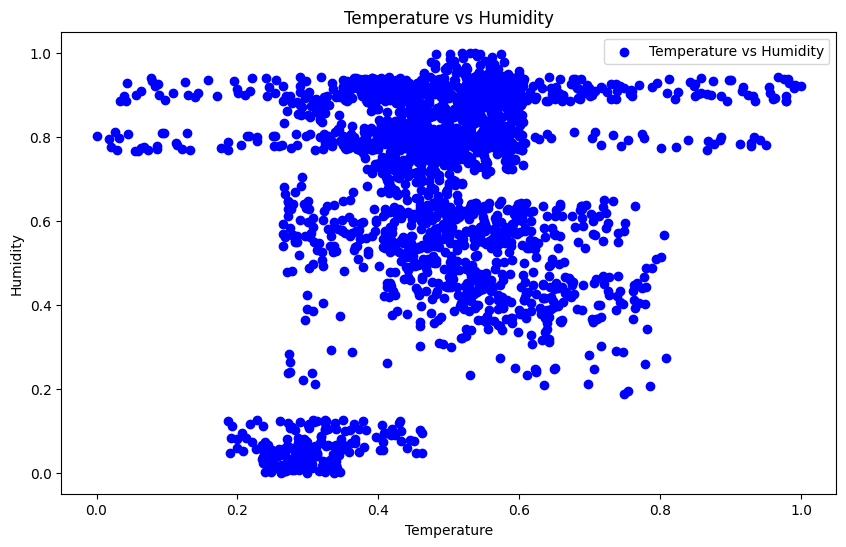

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df['temperature'], scaled_df['humidity'], c='blue', label='Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.legend()
plt.show()

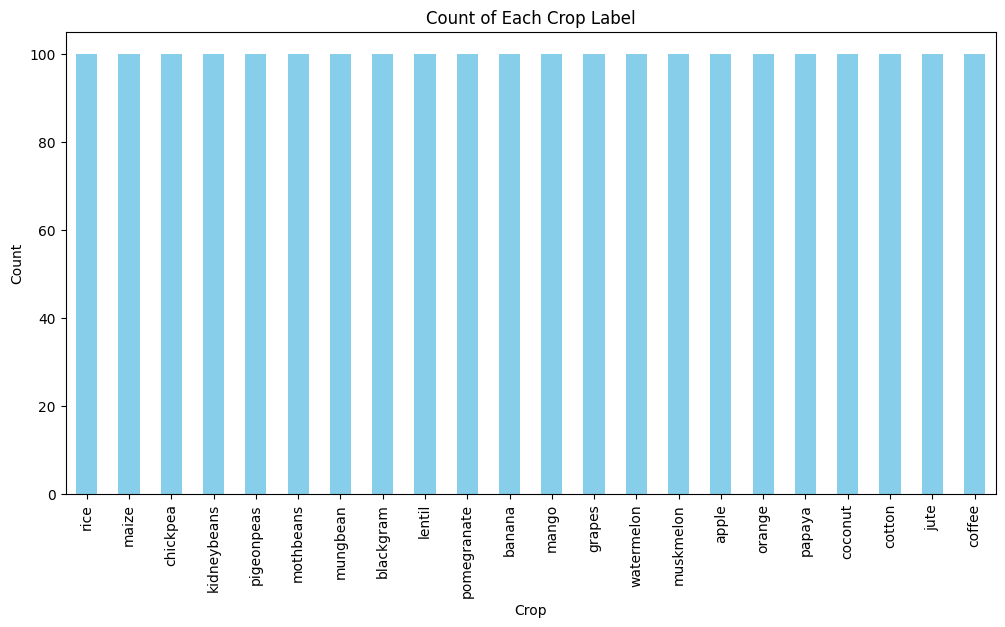

In [21]:
df['label'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Count of Each Crop Label')
plt.show()

In [23]:
scaled_df_lab = scaled_df.drop('label', axis=1)

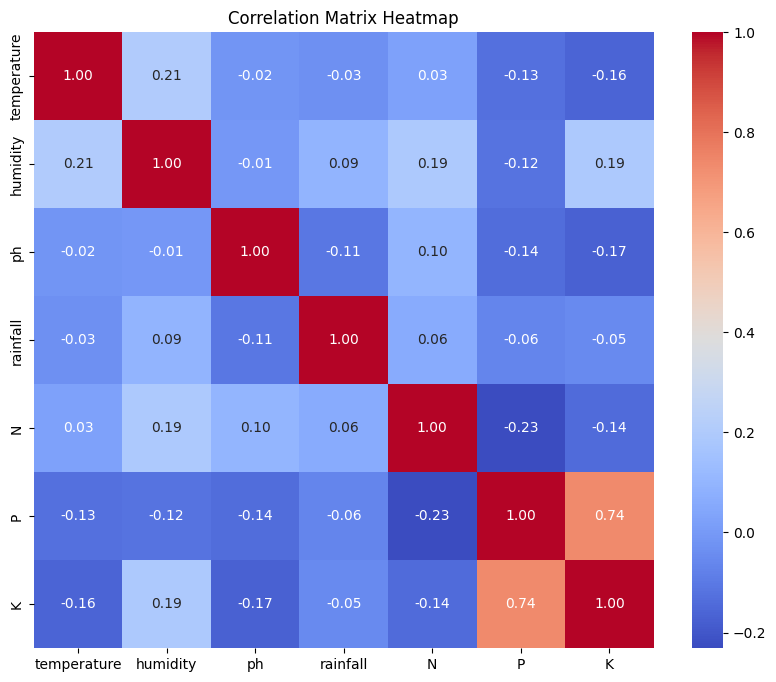

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = scaled_df_lab.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
X = scaled_df.drop('label', axis=1)
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Train a model (example with Decision Tree)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training set shape: (1760, 7)
Testing set shape: (440, 7)
Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00 

In [25]:
import joblib

# Save the RandomForest model to a file
joblib.dump(model, 'Random.pkl')

['Random.pkl']

In [6]:
import pickle
import joblib

# Load the scaler
with open('std_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the RandomForest model
loaded_model = joblib.load('Random.pkl')

# Example data to predict
example_data = np.array([[2,24,34,28.89409382,54.80750249,6.472774648,94.76322976]])

# Scale the example data
scaled_example_data = loaded_scaler.transform(example_data[:, :4])

# Add the non-scaled features back
scaled_example_data = np.hstack((scaled_example_data, example_data[:, 4:]))

# Predict using the loaded model
predictions = loaded_model.predict(scaled_example_data)
print(predictions)

['muskmelon']


/home/ub4c44ff2239c701e906ff510e77495c/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ub4c44ff2239c701e906ff510e77495c/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
scaled_df.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,-0.935587,0.472666,0.043302,1.810361,90,42,43,rice
1,-0.759646,0.397051,0.734873,2.242058,85,58,41,rice
2,-0.515898,0.486954,1.771510,2.921066,60,55,44,rice
3,0.172807,0.389805,0.660308,2.537048,74,35,40,rice
4,-1.083647,0.454792,1.497868,2.898373,78,42,42,rice


In [29]:
# Arrange the columns of df in the same order as scaled_df
df_reordered = df[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K', 'label']]

# Save the reordered dataframe to a new file
df_reordered.to_csv('crop_final.csv', index=False)

In [17]:
cp = pd.read_csv('crop_final.csv')

In [18]:
cp.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,20.879744,82.002744,6.502985,202.935536,90,42,43,rice
1,21.770462,80.319644,7.038096,226.655537,85,58,41,rice
2,23.004459,82.320763,7.840207,263.964248,60,55,44,rice
3,26.491096,80.158363,6.980401,242.864034,74,35,40,rice
4,20.130175,81.604873,7.628473,262.717340,78,42,42,rice


In [31]:
cp.sample(20)

,temperature,humidity,ph,rainfall,N,P,K,label
417,18.319104,34.697766,4.964888,107.472161,3,68,16,pigeonpeas
1936,22.000851,79.472710,7.388266,90.422242,113,38,25,cotton
787,29.632105,65.913600,7.421608,71.163320,44,55,25,blackgram
1386,26.275206,86.632496,6.956509,54.387485,92,7,48,watermelon
1717,32.661606,90.789317,6.927804,78.850855,38,51,52,papaya
2011,25.757349,88.366685,6.025029,189.426348,74,46,45,jute
895,23.052764,60.424786,7.011121,52.602853,26,56,22,lentil
1970,24.164023,76.743390,6.436692,61.946261,132,52,19,cotton
165,20.688999,59.437534,6.864794,103.651438,75,53,18,maize
1053,27.718225,76.578532,6.036079,102.209984,93,81,50,banana


In [23]:
# Select random rows from the dataframe
random_rows = df.sample(20)

# Save the data to a text file
random_rows.to_csv('random_data.txt', index=False, header=False, sep=',')

In [8]:
import pickle
import joblib

# Load the scaler
with open('std_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the RandomForest model
loaded_model = joblib.load('Random.pkl')

# Example data to predict
# example_data = np.array([[23.5,20,5,160,36,57,18]])
# Input comma separated values
input_values = input("Enter the values (comma separated): ")
example_data = np.array([list(map(float, input_values.split(',')))])

# Scale the example data
scaled_example_data = loaded_scaler.transform(example_data[:, :4])

# Add the non-scaled features back
scaled_example_data = np.hstack((scaled_example_data, example_data[:, 4:]))

# Predict using the loaded model
predictions = loaded_model.predict(scaled_example_data)
print(predictions)

['jute']


/home/ub4c44ff2239c701e906ff510e77495c/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ub4c44ff2239c701e906ff510e77495c/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
scaled_df.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,-0.935587,0.472666,0.043302,1.810361,90,42,43,rice
1,-0.759646,0.397051,0.734873,2.242058,85,58,41,rice
2,-0.515898,0.486954,1.771510,2.921066,60,55,44,rice
3,0.172807,0.389805,0.660308,2.537048,74,35,40,rice
4,-1.083647,0.454792,1.497868,2.898373,78,42,42,rice


In [47]:


# Find the highest value in each column
max_in_columns = df.max(axis=0)


print("\nHighest value in each column:")
print(max_in_columns)


Highest value in each column:
N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object
